## Ensemble Learning Examples

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly

In [75]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

## Different Datasets

In [76]:
titanic = sns.load_dataset('titanic')
print(titanic.shape)
titanic.head()

(891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [77]:
titanic_numerical_df = titanic[['age','sibsp', 'fare', 'parch', 'pclass', 'survived']]
titanic_numerical_df.describe()

,age,sibsp,fare,parch,pclass,survived
count,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,32.204208,0.381594,2.308642,0.383838
std,14.526497,1.102743,49.693429,0.806057,0.836071,0.486592
min,0.420000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,20.125000,0.000000,7.910400,0.000000,2.000000,0.000000
50%,28.000000,0.000000,14.454200,0.000000,3.000000,0.000000
75%,38.000000,1.000000,31.000000,0.000000,3.000000,1.000000
max,80.000000,8.000000,512.329200,6.000000,3.000000,1.000000


In [78]:
titanic_numerical_df.isnull().any()

age          True
sibsp       False
fare        False
parch       False
pclass      False
survived    False
dtype: bool

In [79]:
print(titanic_numerical_df.shape)
titanic_numerical_df = titanic_numerical_df.dropna()
print(titanic_numerical_df.shape)
titanic_numerical_df.isnull().any()

(891, 6)
(714, 6)


age         False
sibsp       False
fare        False
parch       False
pclass      False
survived    False
dtype: bool

In [80]:
salary = pd.read_csv("Salaries.csv")
salary.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [81]:
salary.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [82]:
housing = pd.read_csv("data/USA_housing.csv")
housing.head()

,Income,HouseAge,NumberOfRooms,AreaNumberOfBedrooms,Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [83]:
housing.describe()

,Income,HouseAge,NumberOfRooms,AreaNumberOfBedrooms,Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562390,5.322283,6.299250,3.140000,29403.928700,9.975771e+05
50%,68804.286405,5.970429,7.002902,4.050000,36199.406690,1.232669e+06
75%,75783.338665,6.650808,7.665871,4.490000,42861.290770,1.471210e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


In [84]:
cancer = pd.read_csv("data/breast_cancer.csv")
cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [50]:
# Titanic Dataset
df = titanic_numerical_df
X = df.drop('survived',axis=1)
y = df['survived']

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

### You can switch using different datasets by changing which X, y array you will be using. For illustration purpose, we will use the make_moons dataset 

### make_moons dataset is an generated datasets that looks like two half circles (moons) interleaved together for testing machine learning

In [52]:
# make_moons datasets
from sklearn.datasets import make_moons
X, y = make_moons(noise=0.1, random_state=101, n_samples=500)
print(X[:10])
print(y[:10])

[[ 1.03555869  0.22184251]
 [ 0.71485468 -0.42307694]
 [ 0.34454971  0.89850164]
 [ 1.070162    0.06218799]
 [-0.36510818  0.88582424]
 [ 0.79784842 -0.2804715 ]
 [ 0.91118081  0.42780853]
 [-0.67994043  0.61954582]
 [ 0.52721802  0.92555242]
 [ 1.57235868 -0.38136579]]
[0 1 0 0 0 1 0 0 0 1]


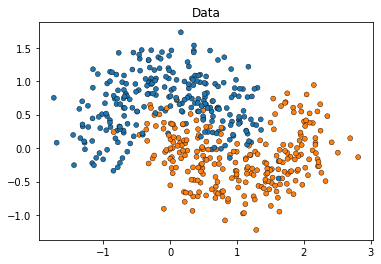

In [86]:
# make moon datasets
sns.scatterplot(
    x=X[:, 0], y=X[:, 1], hue=y, marker="o", s=25, edgecolor="k", legend=False
).set_title("Data")
plt.show()

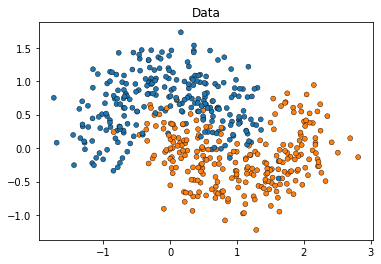

In [87]:
X, y = make_moons(noise=0.3, random_state=101, n_samples=500)
sns.scatterplot(
    x=X[:, 0], y=X[:, 1], hue=y, marker="o", s=25, edgecolor="k", legend=False
).set_title("Data")
plt.show()

In [88]:
# use 0.3 noise for the make moons data set
X, y = make_moons(n_samples=500, noise=0.30, random_state=101)

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101)

In [91]:
len(X)

500

## Voting Classifiers

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

In [58]:
log_clf = LogisticRegression(random_state=100)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=100)
svm_clf = SVC(gamma="scale", probability=True, random_state=100)

for clf in (log_clf, rnd_clf, svm_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    print(classification_report(y_test, y_pred))
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
    print('\n')

              precision    recall  f1-score   support

           0       0.79      0.89      0.84        70
           1       0.83      0.71      0.76        55

    accuracy                           0.81       125
   macro avg       0.81      0.80      0.80       125
weighted avg       0.81      0.81      0.81       125

LogisticRegression 0.808


              precision    recall  f1-score   support

           0       0.90      0.93      0.92        70
           1       0.91      0.87      0.89        55

    accuracy                           0.90       125
   macro avg       0.90      0.90      0.90       125
weighted avg       0.90      0.90      0.90       125

RandomForestClassifier 0.904


              precision    recall  f1-score   support

           0       0.90      0.93      0.92        70
           1       0.91      0.87      0.89        55

    accuracy                           0.90       125
   macro avg       0.90      0.90      0.90       125
weighted avg    

***Hard voting classifier***

In [59]:
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)], voting='hard')
voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)

print(classification_report(y_test, y_pred))
print(voting_clf.__class__.__name__, accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91        70
           1       0.89      0.87      0.88        55

    accuracy                           0.90       125
   macro avg       0.90      0.89      0.89       125
weighted avg       0.90      0.90      0.90       125

VotingClassifier 0.896


***Soft Voting result can be better***

In [60]:
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)], voting='soft')
voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)

print(classification_report(y_test, y_pred))
print(voting_clf.__class__.__name__, accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92        70
           1       0.91      0.89      0.90        55

    accuracy                           0.91       125
   macro avg       0.91      0.91      0.91       125
weighted avg       0.91      0.91      0.91       125

VotingClassifier 0.912


## Bagging ensembles

In [101]:
len(X_train)

375

In [106]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=101), n_estimators=500,
    max_samples=100, bootstrap=True, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

#print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

0.912


In [62]:
tree_clf = DecisionTreeClassifier(random_state=101)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
#print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred_tree))

0.904


In [63]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

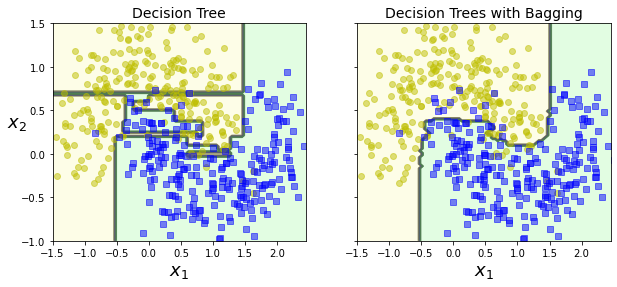

In [64]:
fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)
plt.sca(axes[1])
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Trees with Bagging", fontsize=14)
plt.ylabel("")
plt.show()

## Random Forests

In [65]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=100)
rnd_clf.fit(X_train, y_train)

y_pred = rnd_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.912


In [66]:
# Random Forests and Bag Classifier predictions are alsmost the same
y_pred_bag = bag_clf.predict(X_test)
y_pred_rf = rnd_clf.predict(X_test)
np.sum(y_pred_bag == y_pred_rf) / len(y_pred_bag)

0.984

## AdaBoost

In [67]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4), n_estimators=200, 
                             learning_rate=0.5, random_state=100)
ada_clf.fit(X_train, y_train)

y_pred = ada_clf.predict(X_test)

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93        70
           1       0.92      0.89      0.91        55

    accuracy                           0.92       125
   macro avg       0.92      0.92      0.92       125
weighted avg       0.92      0.92      0.92       125

0.92


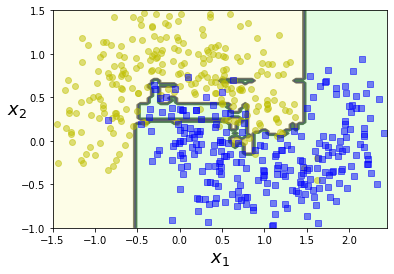

In [68]:
plot_decision_boundary(ada_clf, X, y)

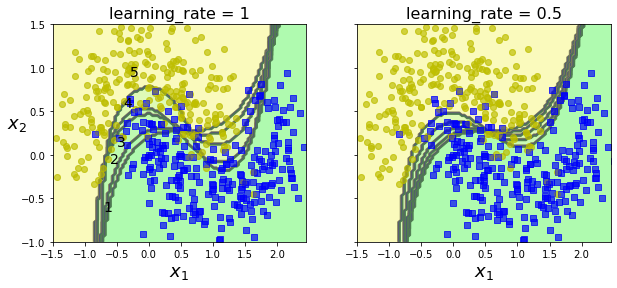

In [69]:
m = len(X_train)

fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)

for subplot, learning_rate in ((0, 1), (1, 0.5)):
    sample_weights = np.ones(m)
    plt.sca(axes[subplot])
    for i in range(5):
        svm_clf = SVC(kernel="rbf", C=0.05, gamma="scale", random_state=42)
        svm_clf.fit(X_train, y_train, sample_weight=sample_weights)
        y_pred = svm_clf.predict(X_train)
        sample_weights[y_pred != y_train] *= (1 + learning_rate)
        plot_decision_boundary(svm_clf, X, y, alpha=0.2)
        plt.title("learning_rate = {}".format(learning_rate), fontsize=16)
    if subplot == 0:
        plt.text(-0.7, -0.65, "1", fontsize=14)
        plt.text(-0.6, -0.10, "2", fontsize=14)
        plt.text(-0.5,  0.10, "3", fontsize=14)
        plt.text(-0.4,  0.55, "4", fontsize=14)
        plt.text(-0.3,  0.90, "5", fontsize=14)
    else:
        plt.ylabel("")

plt.show()

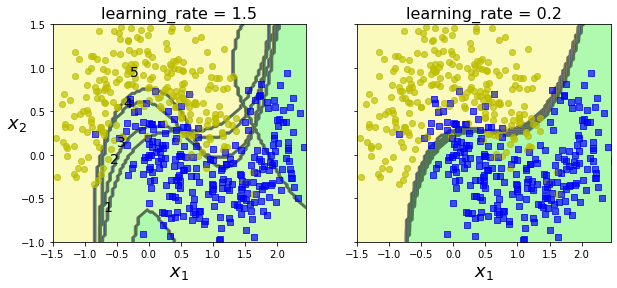

In [70]:
m = len(X_train)

fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)

for subplot, learning_rate in ((0, 1.5), (1, 0.2)):
    sample_weights = np.ones(m)
    plt.sca(axes[subplot])
    for i in range(5):
        svm_clf = SVC(kernel="rbf", C=0.05, gamma="scale", random_state=42)
        svm_clf.fit(X_train, y_train, sample_weight=sample_weights)
        y_pred = svm_clf.predict(X_train)
        sample_weights[y_pred != y_train] *= (1 + learning_rate)
        plot_decision_boundary(svm_clf, X, y, alpha=0.2)
        plt.title("learning_rate = {}".format(learning_rate), fontsize=16)
    if subplot == 0:
        plt.text(-0.7, -0.65, "1", fontsize=14)
        plt.text(-0.6, -0.10, "2", fontsize=14)
        plt.text(-0.5,  0.10, "3", fontsize=14)
        plt.text(-0.4,  0.55, "4", fontsize=14)
        plt.text(-0.3,  0.90, "5", fontsize=14)
    else:
        plt.ylabel("")

plt.show()

## Gradient Boost

In [71]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(learning_rate=0.5, random_state=100)
gb_clf.fit(X_train, y_train)

y_pred = gb_clf.predict(X_test)

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94        70
           1       0.93      0.91      0.92        55

    accuracy                           0.93       125
   macro avg       0.93      0.93      0.93       125
weighted avg       0.93      0.93      0.93       125

0.928


## XGBoost

In [72]:
try:
    import xgboost as xgb
except:
    import os
    os.system("pip install xgboost")

In [73]:
xgb_clf = xgb.XGBClassifier(learning_rate=0.5, random_state=100, use_label_encoder=False)
xgb_clf.fit(X_train, y_train)

y_pred = xgb_clf.predict(X_test)

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[17:45:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.90      0.94      0.92        70
           1       0.92      0.87      0.90        55

    accuracy                           0.91       125
   macro avg       0.91      0.91      0.91       125
weighted avg       0.91      0.91      0.91       125

0.912
